In [7]:
import numpy as np          # linear algebra
import pandas as pd         # data processing, CSV file I/O (e.g. pd.read_csv)
from random import randint
from tqdm import tqdm       # Progress Bars
import cv2
import matplotlib.pyplot as plt
import os


DATA_DIR = "../input"

print(os.listdir(DATA_DIR))


['dog-breed-identification']


In [8]:
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [9]:
df_train = pd.read_csv(os.path.join(DATA_DIR, "dog-breed-identification/labels.csv"))


print("Shape of the training data:", df_train.shape)
print(df_train.head(10))
print("\nData Information:")
print(df_train.info())
print("\nMissing values per column:")
print(df_train.isnull().sum())

Shape of the training data: (10222, 2)
                                 id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB
None

Missing values per column:

In [10]:
def plot_images(images, classes, img_width=224, img_height=224):
    
    # images (list):
    # classes (list): 
    # img_width (int): 
    # img_height (int): 
    
    assert len(images) == len(classes) == 9

    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        
        img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_width, img_height))
        
        
        ax.imshow(img)
        
        xlabel = "Breed: {0}".format(classes[i])
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(10)
        
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    
    plt.show()

In [13]:
img_width = 250
img_height = 250
images = []
classes = []


TRAIN_DIR = os.path.join(DATA_DIR, 'dog-breed-identification/train')


for f, breed in tqdm(df_train.values):
    try:
        
        img_path = os.path.join(TRAIN_DIR, f + '.jpg')
        
        
        img = cv2.imread(img_path)
        
        
        if img is None:
            print(f"Warning: Image {img_path} could not be loaded.")
            continue
        
        
        img_resized = cv2.resize(img, (img_width, img_height))
        
        
        images.append(img_resized)
        classes.append(breed)
        
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
print("Number of images loaded:", len(images))
print("First 5 classes:", classes[:5])

100%|██████████| 10222/10222 [00:27<00:00, 374.49it/s]

Number of images loaded: 10222
First 5 classes: ['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever']


Random indices: [2256, 8552, 5011, 9835, 7402, 8752, 6470, 7122, 5959]
Images to show: 9
Classes to show: 9


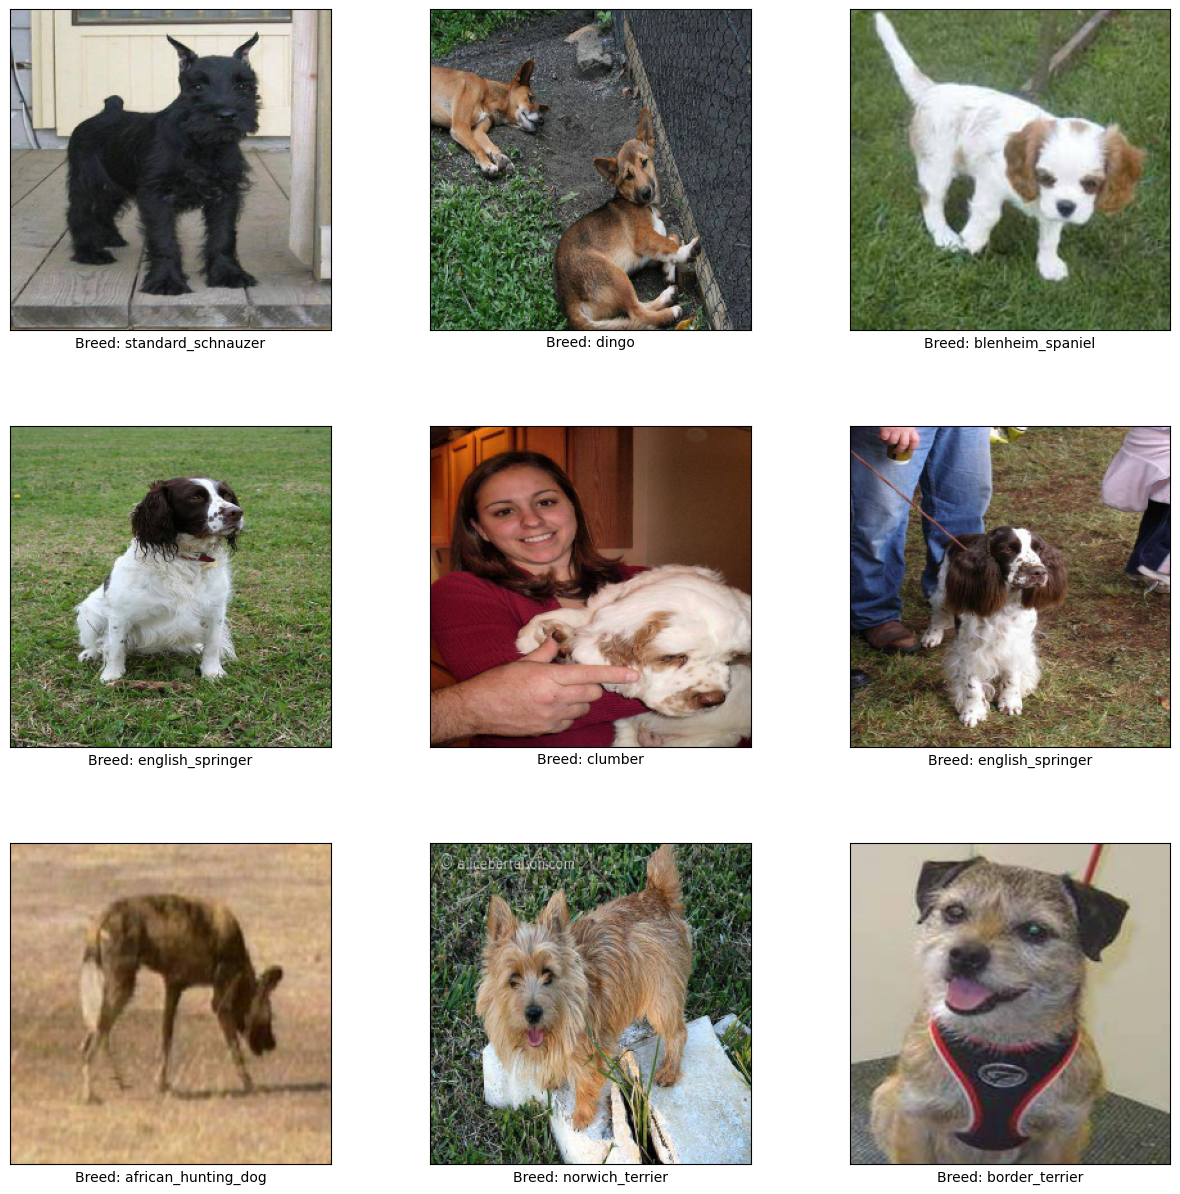

In [14]:
num_images_to_show = 9
random_indices = [randint(0, len(images) - 1) for _ in range(num_images_to_show)]
print("Random indices:", random_indices)

images_to_show = [images[i] for i in random_indices]
classes_to_show = [classes[i] for i in random_indices]

print(f"Images to show: {len(images_to_show)}")
print(f"Classes to show: {len(classes_to_show)}")


plot_images(images_to_show, classes_to_show, img_width=img_width, img_height=img_height)

In [16]:
selected_breeds = ['scottish_deerhound', 'maltese_dog', 'bernese_mountain_dog']


filtered_labels = df_train[df_train['breed'].isin(selected_breeds)]


filtered_labels = filtered_labels.reset_index(drop=True)


filtered_labels.head()

,id,breed
0,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [17]:
from tensorflow.keras.preprocessing import image


filtered_labels = filtered_labels.copy()


CLASS_NAMES = filtered_labels['breed'].unique()


img_height, img_width = 224, 224
X_data = np.zeros((len(filtered_labels), img_height, img_width, 3), dtype='float32')
Y_data = label_binarize(filtered_labels['breed'], classes=selected_breeds)


for i in tqdm(range(len(filtered_labels))):
    img_path = f"/kaggle/input/dog-breed-identification/train/{filtered_labels['id'][i]}.jpg"
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    X_data[i] = img_array / 255.0
    

print('\nTrain Images shape: ', X_data.shape, ' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ', Y_data.shape, ' size: {:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:00<00:00, 414.66it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


In [18]:
model = Sequential()


model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation="softmax"))


model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 108, 108, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 16)     │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 8)      │         3,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,619 (635.23 KB)

 Trainable params: 162,619 (635.23 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from sklearn.model_selection import train_test_split


X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=42)


X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size=0.2, random_state=42)


print('Training data shape:', X_train.shape)
print('Validation data shape:', X_val.shape)
print('Testing data shape:', X_test.shape)

Training data shape: (256, 224, 224, 3)
Validation data shape: (65, 224, 224, 3)
Testing data shape: (36, 224, 224, 3)


Epoch 1/100


I0000 00:00:1721317792.164509     790 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721317792.187444     790 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.2865 - loss: 4.9106 - val_accuracy: 0.3231 - val_loss: 4.8790
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.2865 - loss: 4.8822 - val_accuracy: 0.3846 - val_loss: 4.8552
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.3516 - loss: 4.8560 - val_accuracy: 0.5385 - val_loss: 4.8303
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.3958 - loss: 4.8307 - val_accuracy: 0.4615 - val_loss: 4.8054
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.3672 - loss: 4.8070 - val_accuracy: 0.4462 - val_loss: 4.7810
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.3646 - loss: 4.7816 - val_accuracy: 0.4154 - val_loss: 4.7562
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.3750 - loss: 4.7572 - val_accuracy: 0.4154 - val_loss: 4.7324
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.3646 - loss: 4.7332 - val_accuracy: 0.4154 - val_loss: 4.707

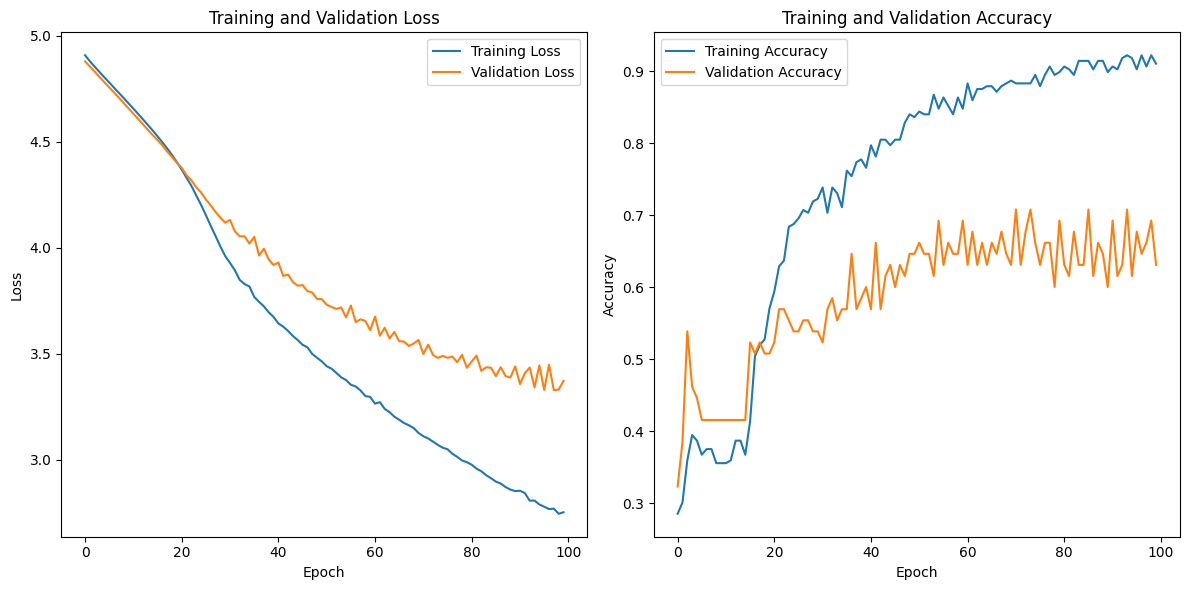

In [20]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_val, Y_val))


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
Y_pred = model.predict(X_test)
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Accuracy over the test set: {accuracy * 100:.2f}%')

1/2 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step

W0000 00:00:1721318364.624567     792 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.8438 - loss: 2.9911

W0000 00:00:1721318366.563401     792 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step - accuracy: 0.8368 - loss: 3.0167
Accuracy over the test set: 83.33%


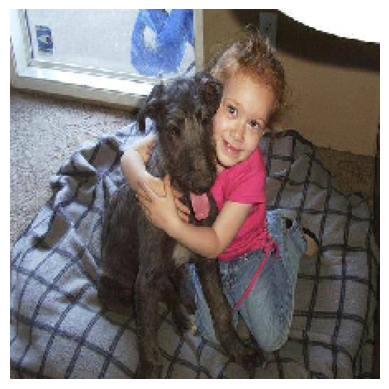

Originally: scottish_deerhound
Predicted: scottish_deerhound


In [24]:
plt.imshow(X_test[2])
plt.axis('off')  
plt.show()

true_label = filtered_labels['breed'][np.argmax(Y_test[2])]
predicted_label = filtered_labels['breed'][np.argmax(Y_pred[2])]

print("Originally:", true_label)
print("Predicted:", predicted_label)

In [ ]:
Y_pred_prob = model.predict(X_test)


Y_pred_labels = [CLASS_NAMES[np.argmax(pred)] for pred in Y_pred_prob]


test_indices = range(len(X_test))


test_ids = filtered_labels.loc[test_indices, 'id']


results_df = pd.DataFrame({'id': test_ids, 'breed': Y_pred_labels})


results_df.to_csv('submission.csv', index=False)
